In [7]:
rm(list=ls())
gc()
library(Seurat)

used     (Mb)  gc trigger (Mb)  max used (Mb) 
Ncells  2194160 117.2   4266568  227.9  4266568 227.9
Vcells 75033170 572.5 109914852  838.6 80869423 617.0

In [1]:
ls()

character(0)

In [2]:
setwd("scRNAseq_WBC_revision/newData")

In [3]:
load("lymphoid.seurat.object.Rdata")

In [4]:
ls()
seurat

[1] "seurat"

An object of class Seurat 
25723 features across 12125 samples within 1 assay 
Active assay: RNA (25723 features)
 1 dimensional reduction calculated: umap

In [5]:
lym=seurat
rm(seurat)

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

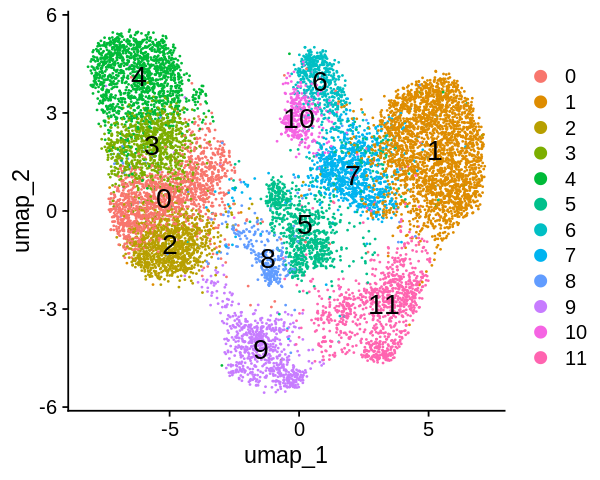

In [6]:
options(repr.plot.width=5,repr.plot.height=4)
DimPlot(lym,reduction = "umap",label = T,label.size = 6,group.by = "new_louvain")

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

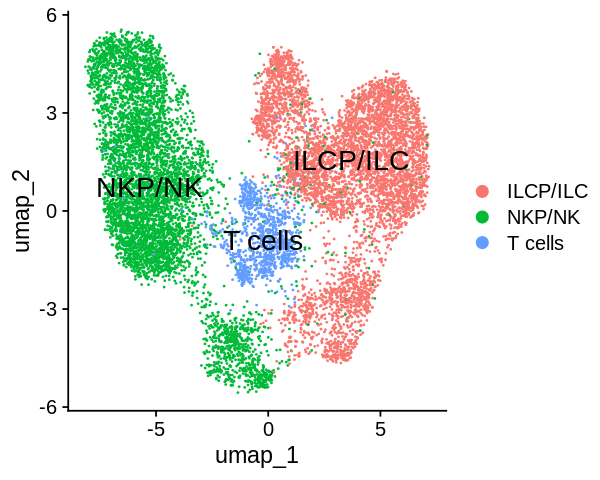

In [6]:
options(repr.plot.width=5,repr.plot.height=4)
DimPlot(lym,reduction = "umap",label = T,label.size = 6,group.by = "annotation")

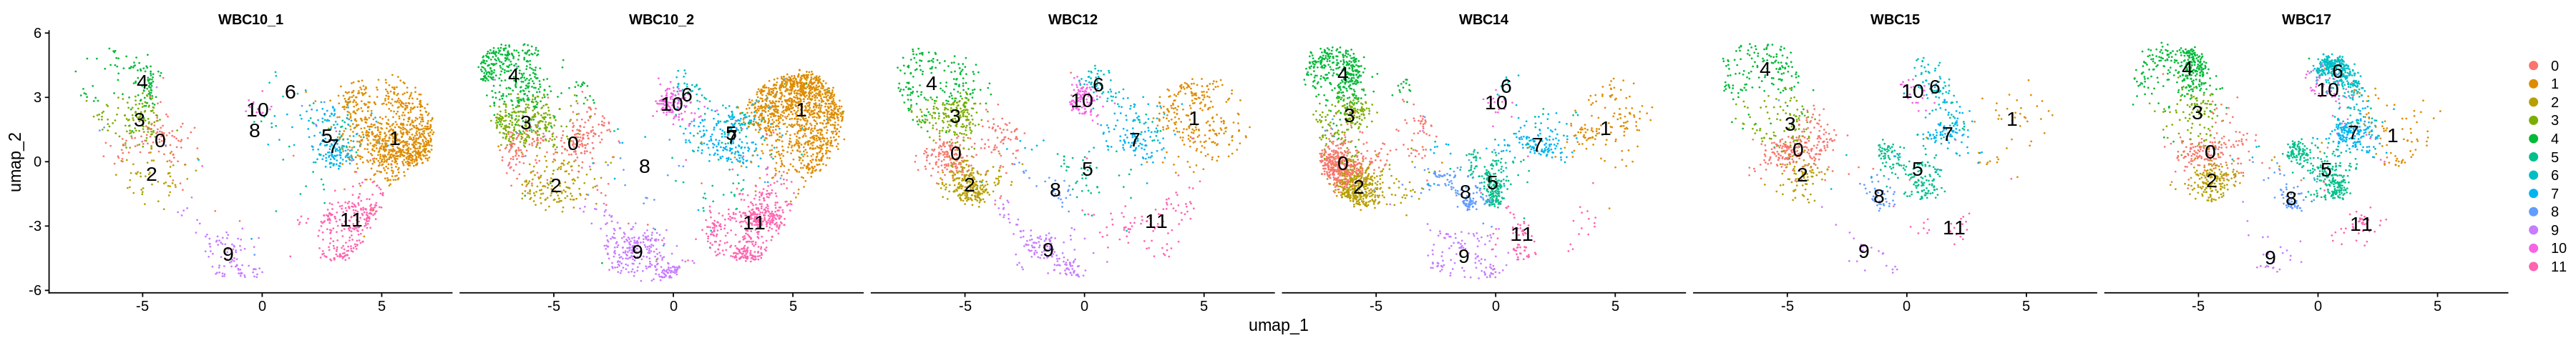

In [8]:
options(repr.plot.width=30,repr.plot.height=4)
DimPlot(lym,reduction = "umap",label = T,label.size = 6,split.by = "batch",group.by = "new_louvain")

In [10]:
table(lym$batch)
Idents(lym)=lym$new_louvain
levels(lym)


WBC10_1 WBC10_2   WBC12   WBC14   WBC15   WBC17 
   1838    3464    1693    2242    1058    1830 

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11"

In [11]:
lym.sub=subset(lym,idents = setdiff(levels(lym),c("5","8")))
table(lym.sub$new_louvain)


   0    1    2    3    4    5    6    7    8    9   10   11 
1437 2600 1085  938 1411    0  518  916    0  712  345  962 

In [12]:
lym.sub.monocle.exp.M=as.matrix(lym.sub@assays$RNA@counts)
lym.sub.monocle.cell.annotation=lym.sub@meta.data
lym.sub.monocle.gene.annotation=data.frame(gene_short_name=rownames(lym.sub),row.names=rownames(lym.sub))

In [13]:
save(lym.sub.monocle.cell.annotation,lym.sub.monocle.gene.annotation,lym.sub.monocle.exp.M,file="lym.sub.monocle.input.Rdata")

In [14]:
Idents(lym.sub)=lym.sub$batch
levels(lym.sub)

[1] "WBC10_1" "WBC10_2" "WBC12"   "WBC14"   "WBC15"   "WBC17"

In [15]:
new.id=rep(c("early","late"),each = 3)
names(new.id)=levels(lym.sub)
lym.sub=RenameIdents(lym.sub,new.id)
table(Idents(lym.sub))


early  late 
 6761  4163 

In [17]:
lym.sub$stage=Idents(lym.sub)
lym.sub.list=SplitObject(lym.sub,split.by = "stage")
names(lym.sub.list)

[1] "early" "late"

In [18]:
lym.sub.early.monocle.exp.M=as.matrix(lym.sub.list[[1]]@assays$RNA@counts)
lym.sub.early.monocle.cell.annotation=lym.sub.list[[1]]@meta.data
lym.sub.early.monocle.gene.annotation=data.frame(gene_short_name=rownames(lym.sub.list[[1]]),row.names=rownames(lym.sub.list[[1]]))
save(lym.sub.early.monocle.cell.annotation,lym.sub.early.monocle.gene.annotation,lym.sub.early.monocle.exp.M,file="lym.sub.early.monocle.input.Rdata")

In [19]:
lym.sub.late.monocle.exp.M=as.matrix(lym.sub.list[[2]]@assays$RNA@counts)
lym.sub.late.monocle.cell.annotation=lym.sub.list[[2]]@meta.data
lym.sub.late.monocle.gene.annotation=data.frame(gene_short_name=rownames(lym.sub.list[[2]]),row.names=rownames(lym.sub.list[[2]]))
save(lym.sub.late.monocle.cell.annotation,lym.sub.late.monocle.gene.annotation,lym.sub.late.monocle.exp.M,file="lym.sub.late.monocle.input.Rdata")

In [20]:
####################################################################################################################################

In [5]:
rm(list=ls())
gc()
library(monocle)

used    (Mb)  gc trigger (Mb)  max used  (Mb) 
Ncells 2236777 119.5   3862441  206.3   3862441 206.3
Vcells 3782968  28.9 108295562  826.3 111194979 848.4

In [3]:
setwd("scRNAseq_WBC_revision/newData")

In [6]:
load("lym.sub.monocle.input.Rdata")
ls()

[1] "lym.sub.monocle.cell.annotation" "lym.sub.monocle.exp.M"          
[3] "lym.sub.monocle.gene.annotation"

In [32]:
#load("lym.sub.early.monocle.input.Rdata")
#ls()

[1] "lym.sub.early.monocle.cell.annotation"
[2] "lym.sub.early.monocle.exp.M"          
[3] "lym.sub.early.monocle.gene.annotation"

In [4]:
#load("lym.sub.late.monocle.input.Rdata")
#ls()

[1] "lym.sub.late.monocle.cell.annotation"
[2] "lym.sub.late.monocle.exp.M"          
[3] "lym.sub.late.monocle.gene.annotation"

In [8]:
pd <- new('AnnotatedDataFrame', data = lym.sub.monocle.cell.annotation)
fd <- new('AnnotatedDataFrame', data = lym.sub.monocle.gene.annotation)

In [10]:
rownames(pd)=colnames(lym.sub.monocle.exp.M)

In [11]:
monocle_cds <- newCellDataSet(lym.sub.monocle.exp.M,
                         phenoData = pd,
                         featureData = fd,
                         expressionFamily = negbinomial.size())

In [12]:
lym<-monocle_cds
lym <- estimateSizeFactors(lym)
lym <- estimateDispersions(lym)

Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message 

Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning 

Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm stopped at boundary value”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in 

Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning 

In [13]:
lym <- detectGenes(lym, min_expr = 3 )

In [14]:
dim(lym)

Features  Samples 
   25723    10924

In [15]:
expressed_genes <- row.names(subset(fData(lym),num_cells_expressed >= 5))

'data.frame':	20541 obs. of  4 variables:
 $ gene_id             : Factor w/ 20541 levels "A1BG","A1BG-AS1",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ mean_expression     : num  0.06052 0.00761 0.09371 0.00965 0.00244 ...
 $ dispersion_fit      : num  3.49 27.74 2.25 21.87 86.39 ...
 $ dispersion_empirical: num  6 25.69 2.68 46.59 182.16 ...


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


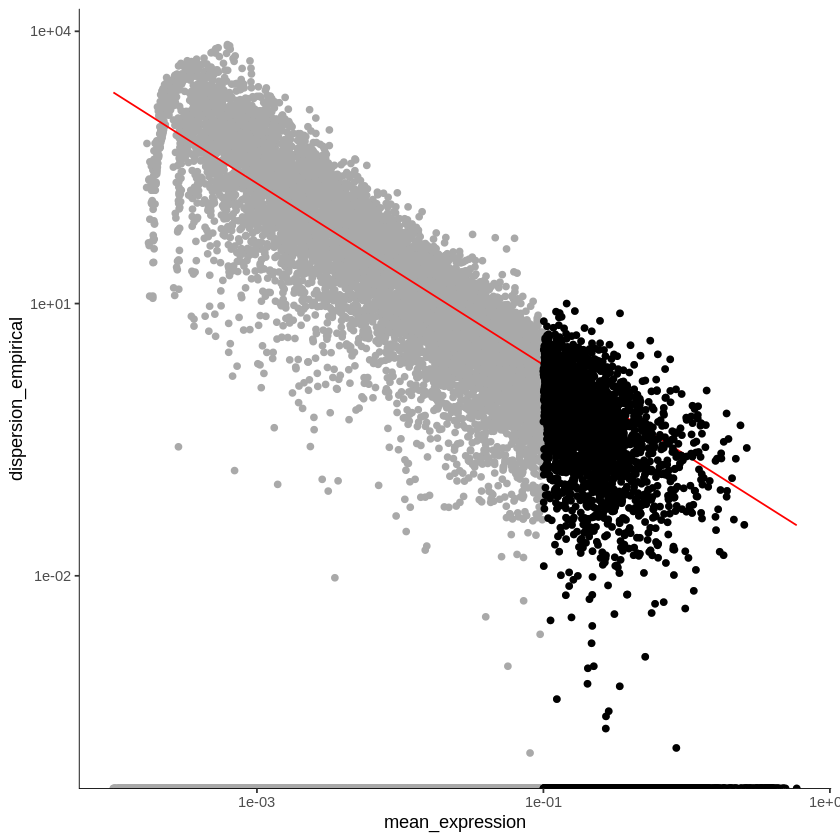

In [16]:
disp_table <- dispersionTable(lym)
str(disp_table)
unsup_clustering_genes <- subset(disp_table, mean_expression >= 0.1)
lym <- setOrderingFilter(lym, unsup_clustering_genes$gene_id)
plot_ordering_genes(lym)

In [17]:
lym <- reduceDimension(lym, max_components = 2, num_dim = 15,reduction_method = 'tSNE', verbose = T)

Remove noise by PCA ...

Reduce dimension by tSNE ...



In [18]:
lym <- clusterCells(lym)

Distance cutoff calculated to 4.726243 


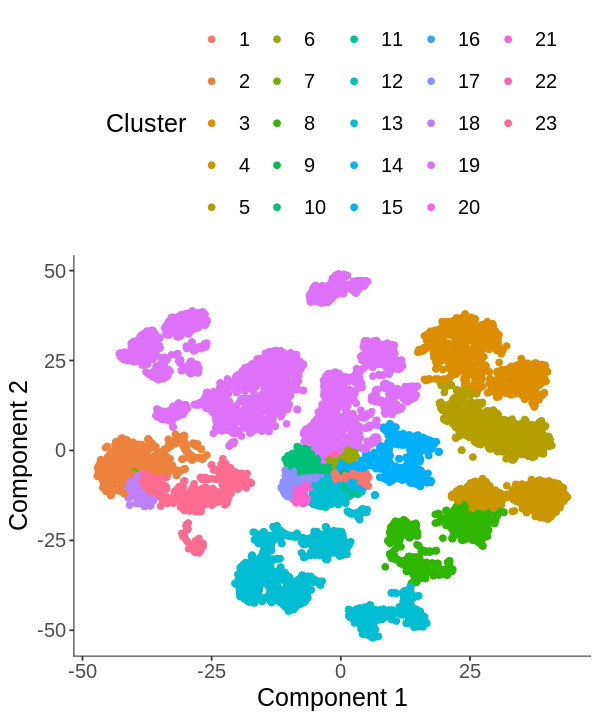

In [19]:
options(repr.plot.width=5,repr.plot.height=6)
plot_cell_clusters(lym, 1, 2)

In [20]:
str(lym.sub.monocle.cell.annotation)

'data.frame':	10924 obs. of  16 variables:
 $ orig.ident             : Factor w/ 1 level "SeuratProject": 1 1 1 1 1 1 1 1 1 1 ...
 $ nCount_RNA             : num  2697 2835 1736 2804 2745 ...
 $ nFeature_RNA           : int  2386 2886 709 2924 2787 4234 2341 3115 551 3627 ...
 $ n_genes                : num  2386 2886 709 2924 2787 ...
 $ n_genes_by_counts      : int  2386 2886 709 2924 2787 4234 2341 3115 551 3627 ...
 $ log1p_n_genes_by_counts: num  7.78 7.97 6.57 7.98 7.93 ...
 $ total_counts           : num  8910 12211 1358 13793 13822 ...
 $ log1p_total_counts     : num  9.1 9.41 7.21 9.53 9.53 ...
 $ total_counts_mt        : num  183 201 71 211 340 718 218 318 6 474 ...
 $ log1p_total_counts_mt  : num  5.21 5.31 4.28 5.36 5.83 ...
 $ pct_counts_mt          : num  2.05 1.65 5.23 1.53 2.46 ...
 $ batch                  : Factor w/ 6 levels "WBC10_1","WBC10_2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ louvain                : Factor w/ 17 levels "0","1","2","3",..: 1 12 3 13 14 3 5 5 3 3 ...
 

In [21]:
table(lym$new_louvain)
lym$new_louvain=as.character(lym$new_louvain)


   0    1    2    3    4    5    6    7    8    9   10   11 
1437 2600 1085  938 1411    0  518  916    0  712  345  962 

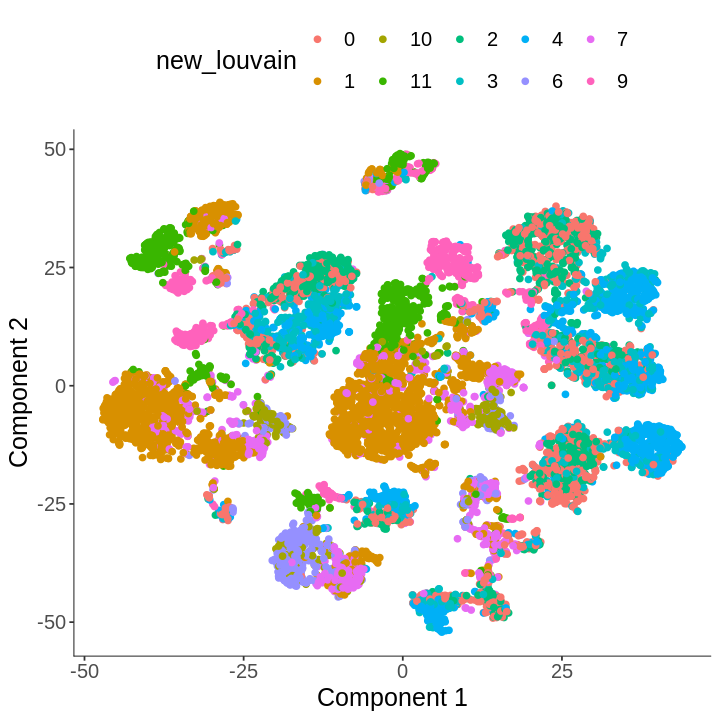

In [22]:
options(repr.plot.width=6,repr.plot.height=6)
plot_cell_clusters(lym, 1, 2, color = "new_louvain")

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


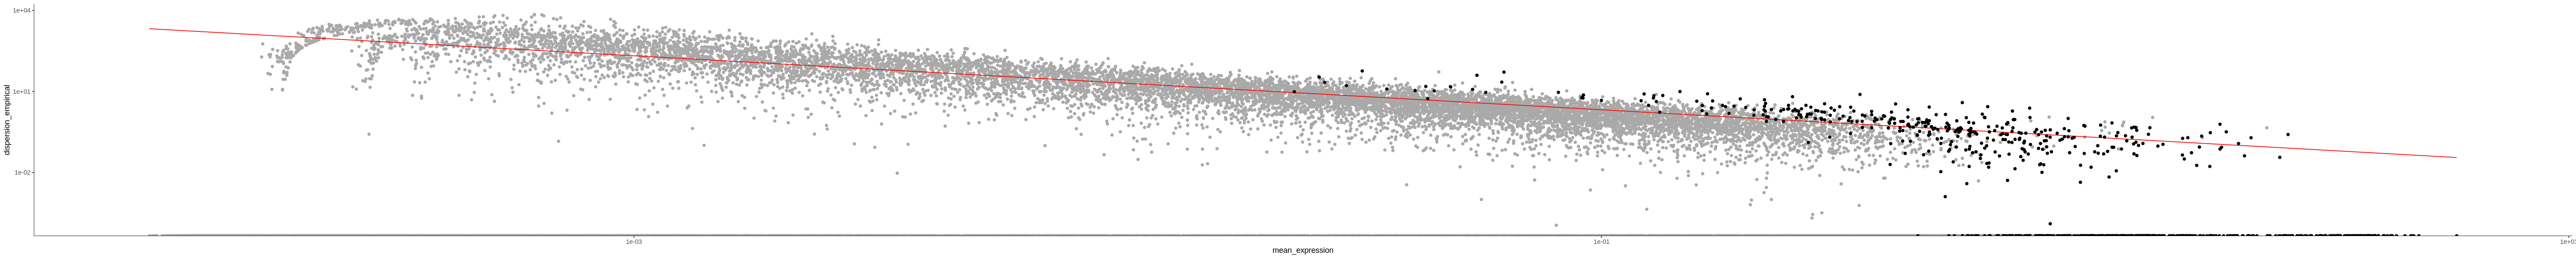

In [33]:
diff_test_res <- differentialGeneTest(lym[expressed_genes,],fullModelFormulaStr = "~num_genes_expressed")
ordering_genes <- row.names (subset(diff_test_res, pval < 0.01)) 

lym <- setOrderingFilter(lym, ordering_genes)
plot_ordering_genes(lym)

In [34]:
lym <- reduceDimension(lym, max_components = 2,method = 'DDRTree')

In [35]:
#lym <- orderCells(lym,root_state = "4")
lym <- orderCells(lym)

In [28]:
############################################################################################################################
#<lym.sub.monocle.exp.M>的作图

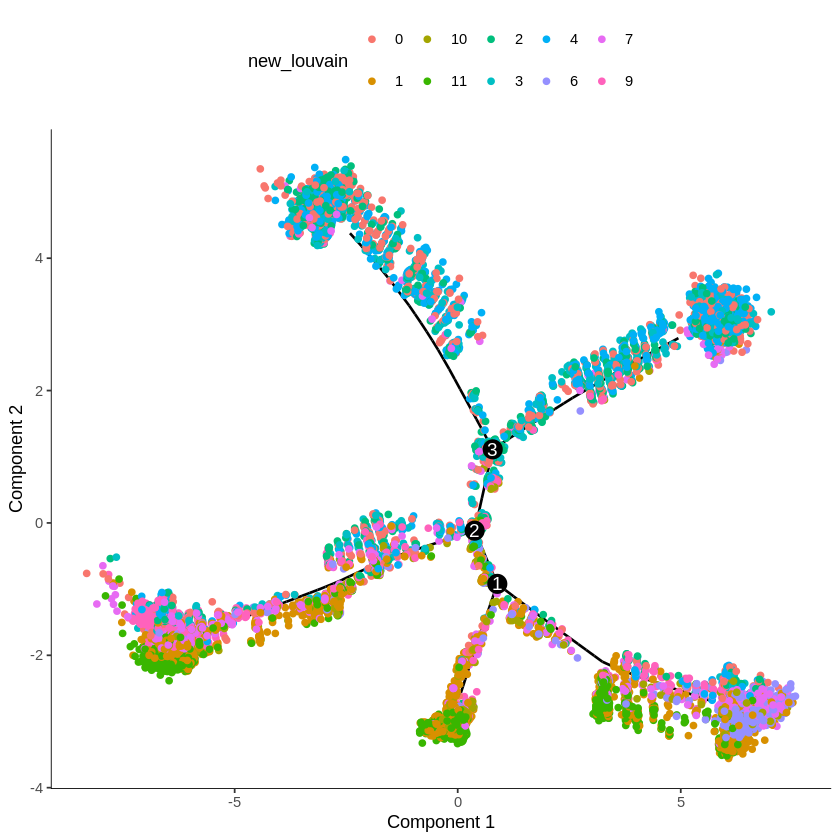

In [36]:
options(repr.plot.width=7,repr.plot.height=7)
plot_cell_trajectory(lym, color_by = "new_louvain")

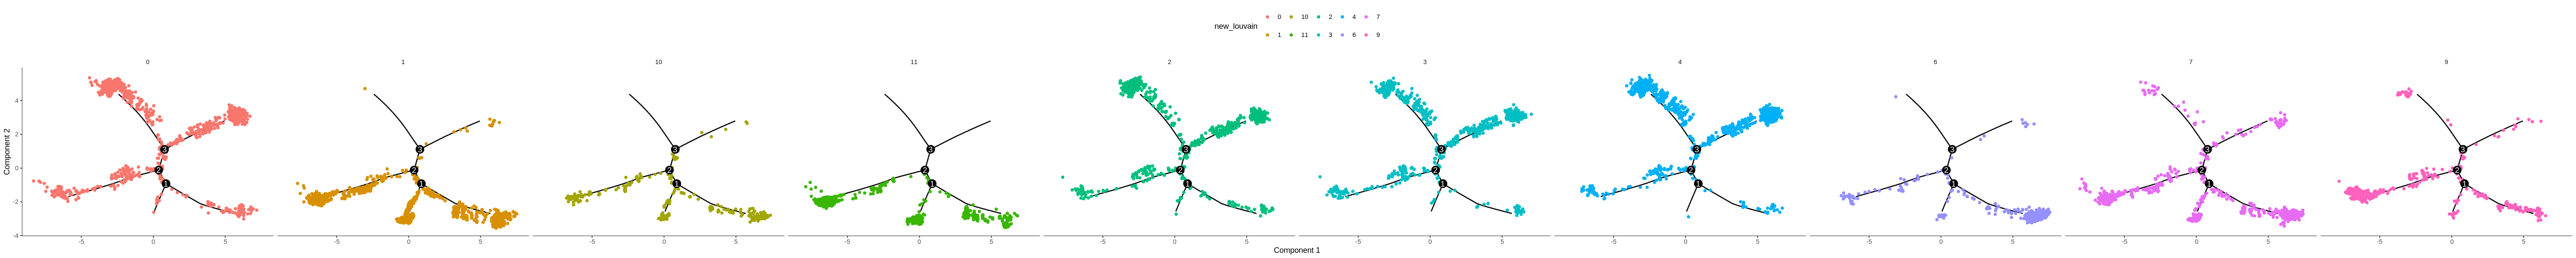

In [37]:
options(repr.plot.width=50,repr.plot.height=5)
plot_cell_trajectory(lym, color_by = "new_louvain") +facet_wrap(~new_louvain, nrow = 1)

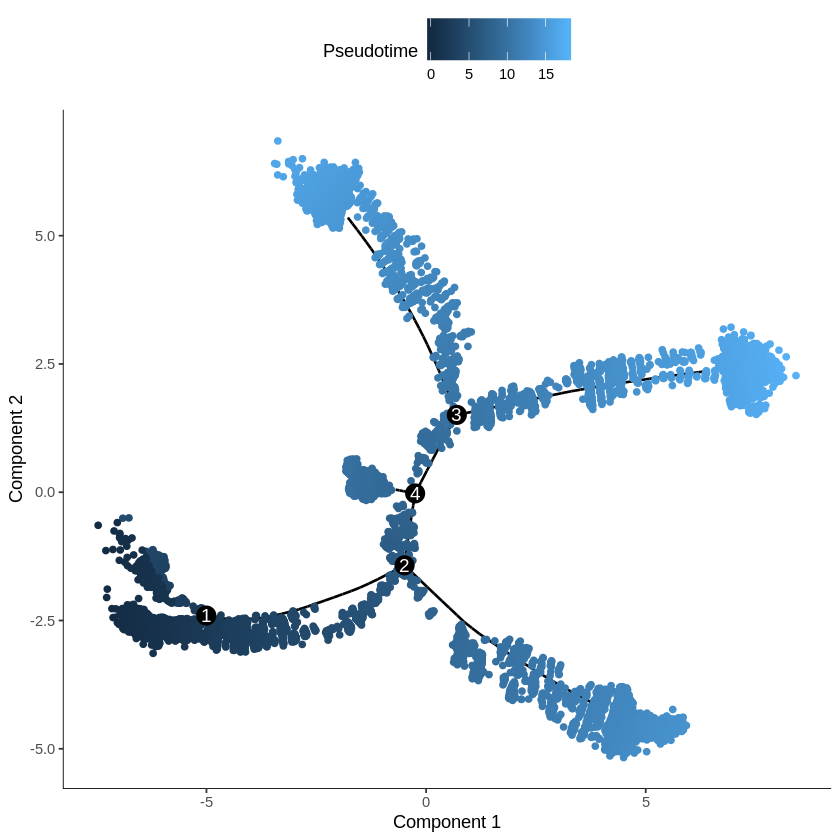

In [24]:
options(repr.plot.width=7,repr.plot.height=7)
plot_cell_trajectory(lym, color_by = "Pseudotime")

In [26]:
save.image("lym.sub.monocle.object.Rdata")

In [29]:
#</lym.sub.monocle.exp.M>的作图
#############################################################################

In [ ]:
#############################################################################
#<lym.sub.early.monocle.exp.M>的作图

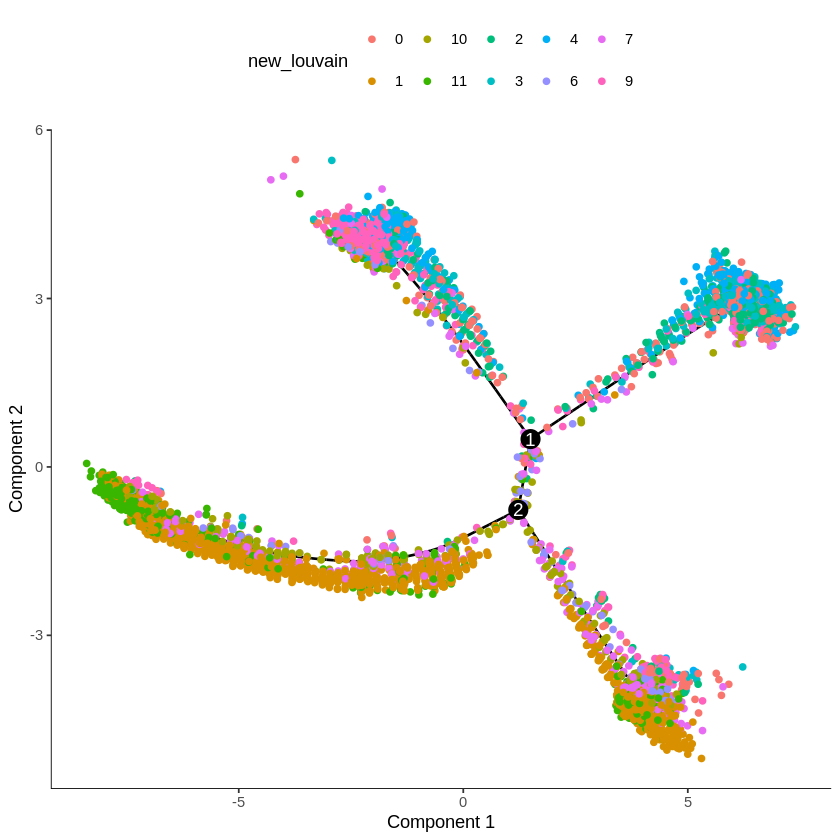

In [53]:
options(repr.plot.width=7,repr.plot.height=7)
plot_cell_trajectory(lym, color_by = "new_louvain")

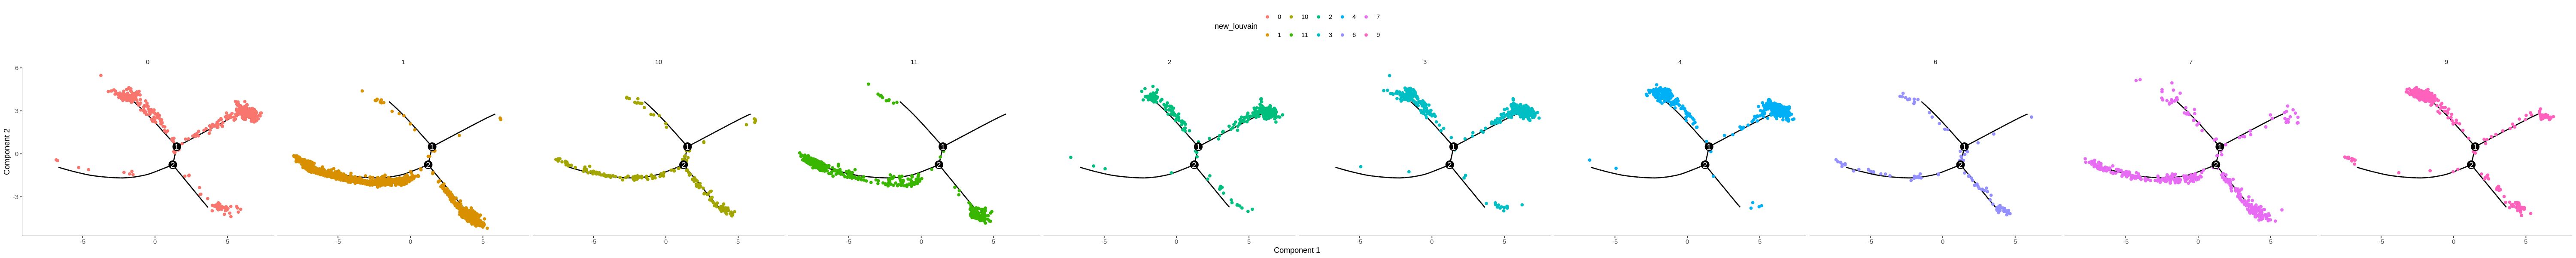

In [54]:
options(repr.plot.width=50,repr.plot.height=5)
plot_cell_trajectory(lym, color_by = "new_louvain") +facet_wrap(~new_louvain, nrow = 1)

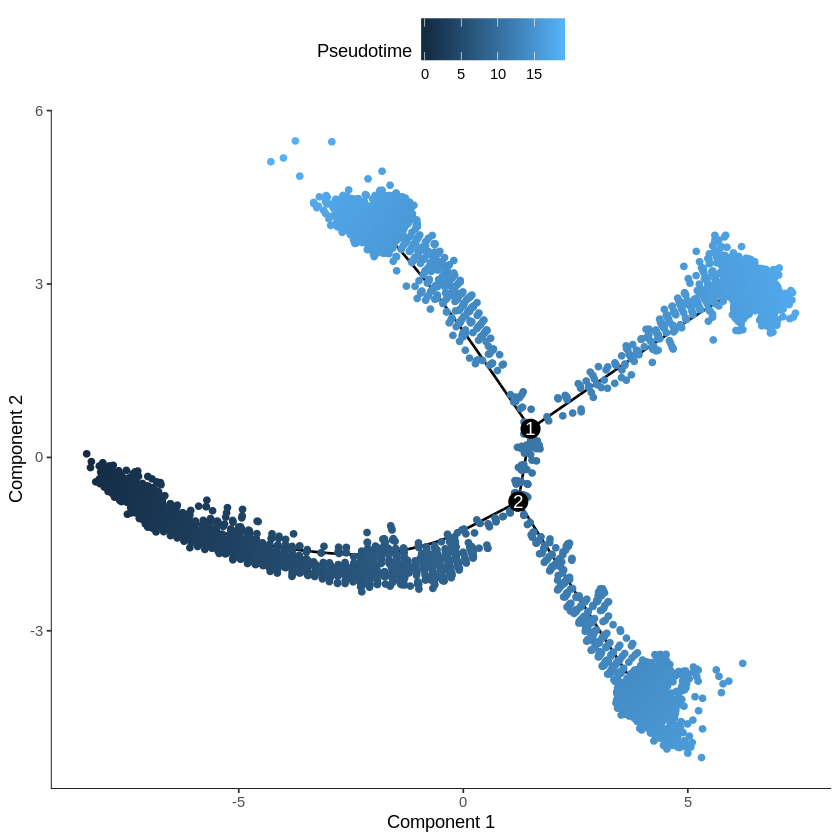

In [55]:
options(repr.plot.width=7,repr.plot.height=7)
plot_cell_trajectory(lym, color_by = "Pseudotime")

In [56]:
save.image("lym.sub.early.monocle.object.Rdata")

In [ ]:
#</lym.sub.early.monocle.exp.M>的作图
#############################################################################

In [ ]:
#############################################################################
#<lym.sub.late.monocle.exp.M>的作图

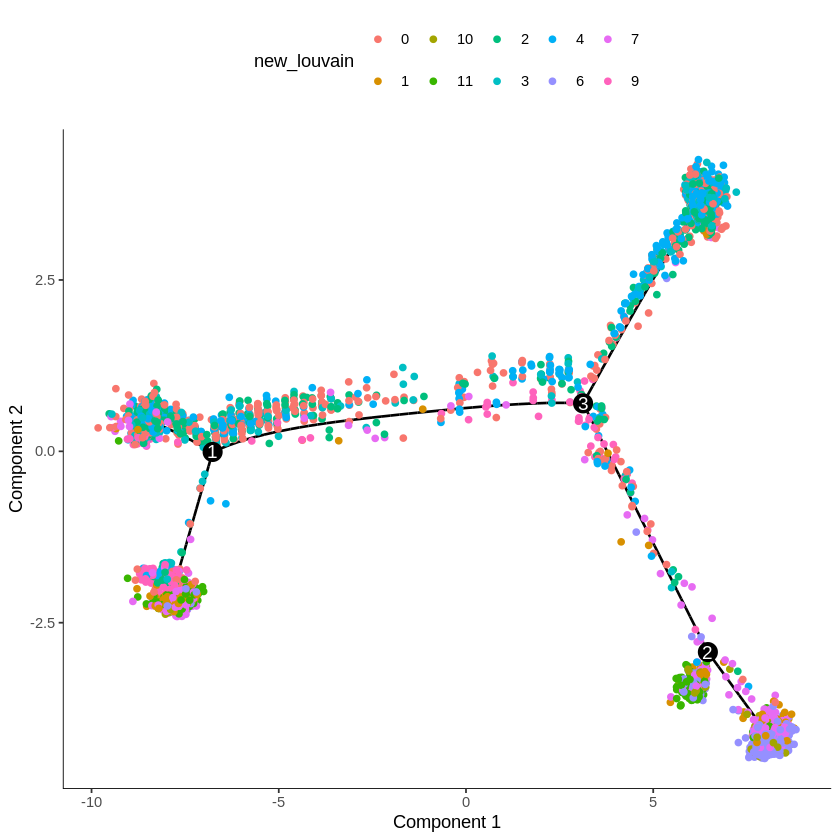

In [77]:
options(repr.plot.width=7,repr.plot.height=7)
plot_cell_trajectory(lym, color_by = "new_louvain")

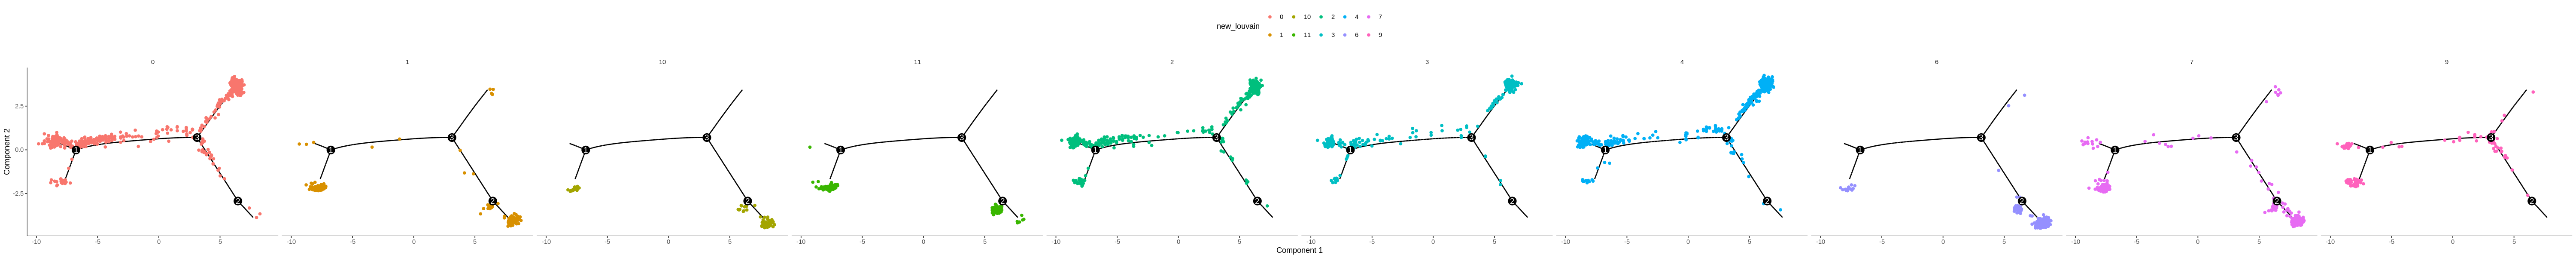

In [78]:
options(repr.plot.width=50,repr.plot.height=5)
plot_cell_trajectory(lym, color_by = "new_louvain") +facet_wrap(~new_louvain, nrow = 1)

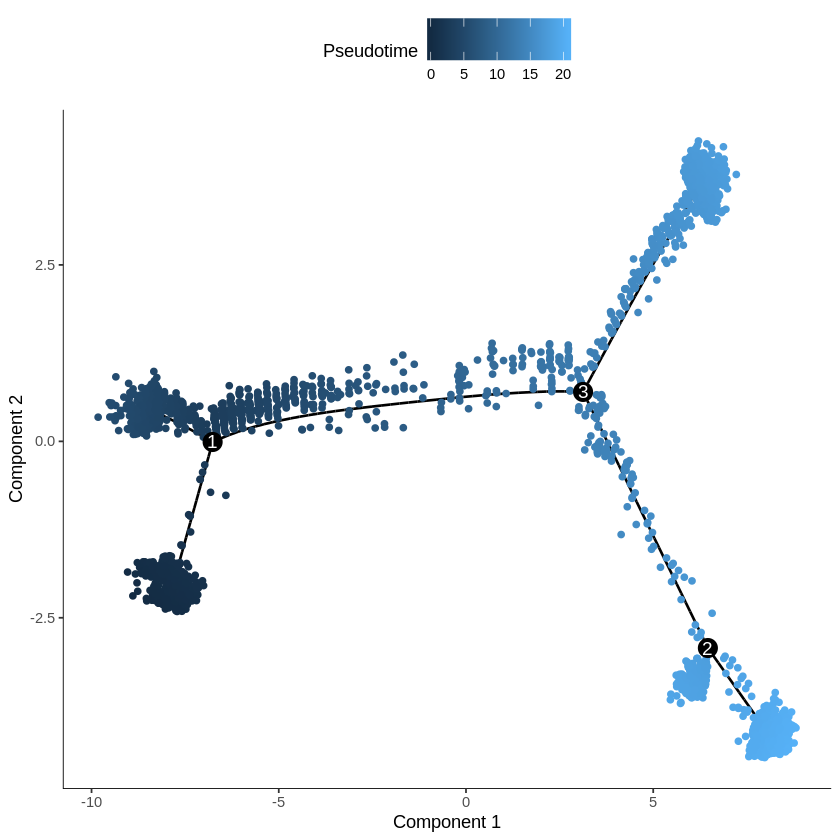

In [79]:
options(repr.plot.width=7,repr.plot.height=7)
plot_cell_trajectory(lym, color_by = "Pseudotime")

In [80]:
save.image("lym.sub.late.monocle.object.Rdata")

In [ ]:
#</lym.sub.late.monocle.exp.M>的作图
#############################################################################